# https://www.kaggle.com/madisonchung/simple-fraud-detection

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Data <br>2. Split by train-test <br>3. Over-sampling train data <br>4. Test on the original imbalanced data

#### 1) Load the whole data
#### 2) StandardScaler: 'Amount' data, replace with the scaled numbers
#### 3) Drop out 'Time' data<br>
##### X: from V1 to V 28 and Scaled Amount                    <br> y: Class (0 or 1)

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
### 0. Hello!

My first visit to Kaggle was about a year ago, and set a goal to upload a posting like other competitive smart people on the board. This is my first posting. Finally achieved sth in 2017! Any comments will be appreciated! Thanks :)


## 1. Introduction
- Preprocessed data: Drop columns, Scaling numbers, Over-sampling
- Logistic Regression, Decision Tree, Random Forest
- Threshold change

In [2]:
def loadData(File):
    data = pd.read_csv(File)
    print("Top five records are: \n", data.head())
    print("Description: \n", data.describe())
    return data

In [3]:
data = loadData("creditcard.csv")

Top five records are: 
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class

In [4]:
def showColDist(colname, data):
    data = pd.DataFrame(data)
    return sns.countplot(x = colname, data = data )

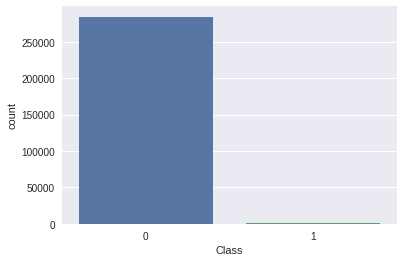

In [5]:
showColDist("Class", data) # Showing high imbalance

In [6]:
def dropCol(colname, axis):
    return data.drop(colname, axis = axis)

In [7]:
data = dropCol('Time', 1)

In [8]:
def showDistplot(data):
    return sns.distplot(data)

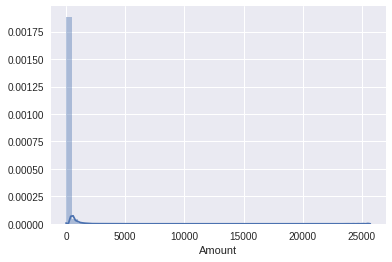

In [9]:
showDistplot(data['Amount']) 

In [10]:
def checkEachCol(data):
    List_col = list(data.columns.values)
    for i in List_col:
        print("====>",i,"<====")
        print(data[i].describe())
checkEachCol(data)

====> V1 <====
count    2.848070e+05
mean     3.919560e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64
====> V2 <====
count    2.848070e+05
mean     5.688174e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64
====> V3 <====
count    2.848070e+05
mean    -8.769071e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64
====> V4 <====
count    2.848070e+05
mean     2.782312e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64
====> V5 <====
count    2.848070e+05
mean    -1.552563e-15
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-01
50%     -5.

In [11]:
def letsNorm(col):
    #from sklearn.preprocessing import StandardScaler
    inp = col.values.reshape(-1,1)
    scaler = StandardScaler()
    scaledData = scaler.fit_transform(inp)
    print("Newly normalized data : \n", scaler.fit_transform(inp),"This will be added, too.")
    data['Normalied'] = scaledData
    return data

In [12]:
data = letsNorm(data["Amount"])

Newly normalized data : 
 [[ 0.24496426]
 [-0.34247454]
 [ 1.16068593]
 ..., 
 [-0.0818393 ]
 [-0.31324853]
 [ 0.51435531]] This will be added, too.


In [13]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalied
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,-0.338516


In [14]:
data = dropCol('Amount', 1) # The new 'Normalized' column replaces the original 'Amount' column.

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalied
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [16]:
def Xy_split(data):
    y = data['Class']
    List_col = list(data.columns.values)
    print(List_col)
    X_col = [x for x in List_col if x != "Class"]
    print(X_col)
    #print(X_col)
    X = data.loc[:,X_col]
    return X,y

In [17]:
X, y = Xy_split(data)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Normalied']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Normalied']


In [18]:
X.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalied
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686


In [19]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [21]:
def randomOverSampling(X, y):
    #from imblearn.over_sampling import RandomOverSampler
    #from collections import Counter
    ros = RandomOverSampler()
    X_resampled, y_resampled = ros.fit_sample(X,y)
    #print(sorted(Counter(y_resampled).items()))
    return X_resampled, y_resampled

In [22]:
X_big = X.copy()
X_big.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalied
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [23]:
y_big = y.copy()
y_big.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [24]:
X_res , y_res = randomOverSampling(X_big, y_big)

In [25]:
print(" The # of original data is ", len(X_big),".\n","The # of the over-sampled one is ", len(X_res),".")

 The # of original data is  284807 .
 The # of the over-sampled one is  568630 .


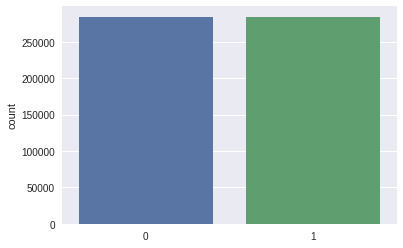

In [26]:
sns.countplot(y_res)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 23)

In [28]:
y_result = pd.DataFrame(y_test)
y_result.head()

,0
0,1
1,1
2,0
3,0
4,0


In [29]:
def addResult(name, y_pred):
    y_col = pd.DataFrame(y_pred)
    y_result[name] = y_pred
    return y_result

In [30]:
X_train

array([[ -8.53992812e-01,  -4.08583048e-01,   1.37848165e+00, ...,
         -1.54020092e-02,  -1.14957587e-03,   6.27900959e-01],
       [ -5.82511491e+00,  -5.12526469e+00,   1.57183155e+00, ...,
          3.21771639e-01,  -3.33776645e-01,   1.51928798e-01],
       [ -1.10184701e+00,  -1.63244121e+00,   9.01066557e-01, ...,
         -3.36071709e-01,  -1.77586828e-01,   1.72537562e+00],
       ..., 
       [  1.04210689e+00,  -1.08730767e-01,  -2.77376897e-02, ...,
         -7.78302224e-02,   1.26704510e-02,   7.45258489e-02],
       [  3.14596590e-01,   2.66067028e+00,  -5.92003738e+00, ...,
          6.20866539e-01,   1.85030355e-01,  -3.49231307e-01],
       [  1.86822575e+00,   1.36307704e+00,  -1.99493428e+00, ...,
         -6.62944886e-03,   1.72577349e-02,  -3.40675402e-01]])

In [31]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

### 1. Linear Regression
---

####  `sklearn.linear_model.LinearRegression`
---

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LogisticReg = LogisticRegression()

In [34]:
LogisticReg.fit(X= X_train, y = y_train)
LogisticReg.predict(X = X_test) 
y_pred_lr = LogisticReg.predict(X = X_test)
print(y_pred_lr)

[1 1 0 ..., 0 0 0]


In [36]:
len(y_pred_lr)
y_result["Logistic_reg"] = y_pred_lr

In [37]:
LogisticReg.score(X=X_test,y=y_test)

0.94802262271557003

In [38]:
y_result.head()

,0,Logistic_reg
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


#### 1-2. Evaluation : Confusion Matrix & ROC Curve
---

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_pred = LogisticReg.predict(X_test), y_true = y_test)
# [[ true negative , false positive],
# [false negative], [true positive]]

array([[69347,  1554],
       [ 5835, 65422]])

### 2. Decision Tree
---

#### `sklearn.tree.DecisionTreeClassifier`
---

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
class_weight = 'balanced'
max_depth = 5

In [44]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight = class_weight, max_depth = max_depth, criterion = 'entropy')

In [45]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
dt_model.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0])

In [47]:
dt_model.score(X = X_test, y = y_test)

0.94535657507843385

In [48]:
y_result['DecisionTree'] = dt_model.predict(X_test)

In [49]:
y_result

,0,Logistic_reg,DecisionTree
0,1,1,1
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0
5,1,1,1
6,1,1,0
7,1,1,1
8,1,1,1
9,1,1,1


#### 2-2. Evaluation : Confusion Matrix & ROC Curve
---

In [50]:
confusion_matrix(y_pred = dt_model.predict(X_test), y_true = y_test)

array([[69279,  1622],
       [ 6146, 65111]])

### 3. Random Forest
---

#### 3-1. `sklearn.ensemble.RandomForestClassifier`
---

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
n_estimators = [3,15,75]
class_weight = 'balanced'
max_depth = 5

In [55]:
# rf_mode

for i in n_estimators:
    rf_model = RandomForestClassifier(n_estimators = i, class_weight = class_weight, max_depth = max_depth)
    rf_model.fit(X_train, y_train)
    rf_model.predict(X_test)
    print("rf_model score with # est. {}:".format(i), rf_model.score(X_test, y_test))
    y_result['rf-{}'.format(i)] = rf_model.predict(X_test)

rf_model score with # est. 3: 0.952348795003
rf_model score with # est. 15: 0.953425062255
rf_model score with # est. 75: 0.953797886858


In [60]:
rf_model = RandomForestClassifier(n_estimators = 15, class_weight = class_weight, max_depth = max_depth)

In [61]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### 4-1. Reports: Over-sampled, balanced test data
---

In [63]:
from sklearn.metrics import classification_report

print("Logistic Regression\n",classification_report(y_test, y_pred =LogisticReg.predict(X = X_test)))
print("Decision Tree\n",classification_report(y_test, y_pred =dt_model.predict(X_test)))
print("Random Forest 15 estimators\n",classification_report(y_test, y_pred =rf_model.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

          0       0.92      0.98      0.95     70901
          1       0.98      0.92      0.95     71257

avg / total       0.95      0.95      0.95    142158

Decision Tree
              precision    recall  f1-score   support

          0       0.92      0.98      0.95     70901
          1       0.98      0.91      0.94     71257

avg / total       0.95      0.95      0.95    142158

Random Forest 15 estimators
              precision    recall  f1-score   support

          0       0.92      1.00      0.96     70901
          1       1.00      0.91      0.95     71257

avg / total       0.96      0.96      0.96    142158



#### 4-2. Reports: Original, imbalanced test data
---

In [67]:
X_original = X.copy()
y_original = y.copy()

In [68]:
X_tr, X_te, y_tr, y_te = train_test_split(X_original, y_original, test_size = 0.25, random_state = 23)

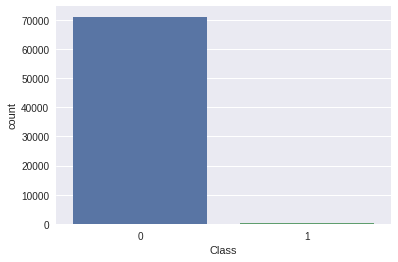

In [76]:
sns.countplot(y_te)

In [70]:
from sklearn.metrics import classification_report

print("Logistic Regression\n",classification_report(y_te, y_pred =LogisticReg.predict(X = X_te)))
print("Decision Tree\n",classification_report(y_te, y_pred =dt_model.predict(X_te)))
print("Random Forest 15 estimators\n",classification_report(y_te, y_pred =rf_model.predict(X_te)))

Logistic Regression
              precision    recall  f1-score   support

          0       1.00      0.98      0.99     71085
          1       0.07      0.97      0.12       117

avg / total       1.00      0.98      0.99     71202

Decision Tree
              precision    recall  f1-score   support

          0       1.00      0.98      0.99     71085
          1       0.06      0.97      0.12       117

avg / total       1.00      0.98      0.99     71202

Random Forest 15 estimators
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     71085
          1       0.34      0.96      0.50       117

avg / total       1.00      1.00      1.00     71202



In [72]:
print("=====Score of each model=========")
print("Logistic Regression: ",LogisticReg.score(X = X_te, y = y_te))
print("Decision Tree: ",dt_model.score(X = X_te, y = y_te))
print("Random Forest:" rf_model.score(X = X_te, y = y_te))

0.977275919216


In [73]:
print(dt_model.score(X = X_te, y = y_te))

0.976756270891


In [74]:
print(rf_model.score(X = X_te, y = y_te))

0.996825931856


#### 5. Changing thresholds
---

In [79]:
from sklearn.metrics import accuracy_score


In [85]:
thresholds = np.arange(0, 1, 0.1)
accuracies_dt = []
y_pred_prob = dt_model.predict_proba(X = X_te)
for i in thresholds:
    y_pred = y_pred_prob[:,1]>i
    accuracies_dt.append(accuracy_score(y_pred = y_pred , y_true = y_te))
accuracies_dt

[0.078565208842448248,
 0.81046880705598157,
 0.90437066374540043,
 0.90437066374540043,
 0.9184994803516755,
 0.97675627089126715,
 0.9938906210499705,
 0.9938906210499705,
 0.9938906210499705,
 0.99873599056206286]

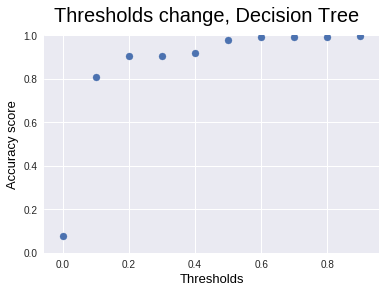

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure() 
plt.scatter(thresholds, accuracies_dt )
plt.xlabel("Thresholds", fontsize = 13, color = 'black')
plt.ylabel("Accuracy score", fontsize = 13, color = 'black')
plt.ylim([0,1])
plt.suptitle("Thresholds change, Decision Tree", fontsize = 20, color = "black")


In [88]:
thresholds = np.arange(0, 1, 0.1)
accuracies_rf = []
y_pred_prob = rf_model.predict_proba(X = X_te)
for i in thresholds:
    y_pred = y_pred_prob[:,1]>i
    accuracies_rf.append(accuracy_score(y_pred = y_pred , y_true = y_te))
accuracies_rf

[0.0016432122693182775,
 0.76124266172298527,
 0.93330243532485047,
 0.97920002247127891,
 0.9932726608803123,
 0.99682593185584678,
 0.99810398584309434,
 0.99911519339344401,
 0.99948035167551474,
 0.99957866352068758]

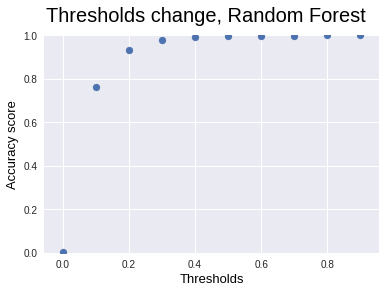

In [89]:
plt.figure() 
plt.scatter(thresholds, accuracies_rf )
plt.xlabel("Thresholds", fontsize = 13, color = 'black')
plt.ylabel("Accuracy score", fontsize = 13, color = 'black')
plt.ylim([0,1])
plt.suptitle("Thresholds change, Random Forest", fontsize = 20, color = "black")